# Расчет энтальпии и энтропии смешения при помощи pycalhad

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pycalphad import Database, equilibrium, binplot, calculate
from pycalphad import variables as v
from pycalphad.plot.utils import phase_legend
import math

### Двойная диаграмма состояния

Строить будем для пары веществ **Ni-Cu** 

In [2]:
db = Database('CuNi-07Tur.tdb')

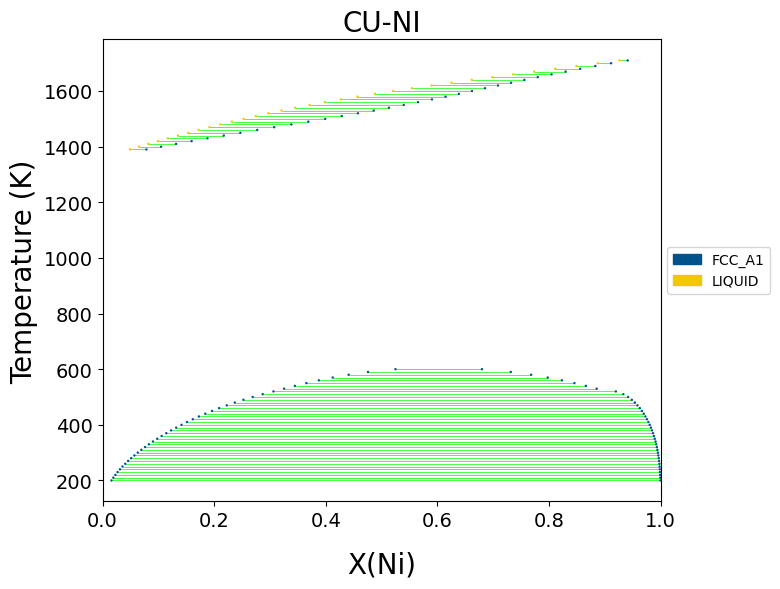

In [3]:
phases = list(db.phases.keys()) # [FCC_A1, LIQUID] - в реальности FCC_A1#1 и FCC_A1#2
press = 101325                  # атмосферное давление, константа
elements = ['NI', 'CU', 'VA']
el_cnt = 1                      # кол-во вещества на 1 моль

fig = plt.figure(figsize=(9,6))
axes = fig.gca()

plt.gca().set_title('Зависимость теплоемкостей от температуры')
binplot(db, elements, phases, {v.X('Ni'):(0,1,0.02), v.T: (200, 1800, 10), v.P:press, v.N: el_cnt}, plot_kwargs={'ax': axes})

plt.show()

Полученная нами диаграмма совпадает с той, что построил ThermoCalc.
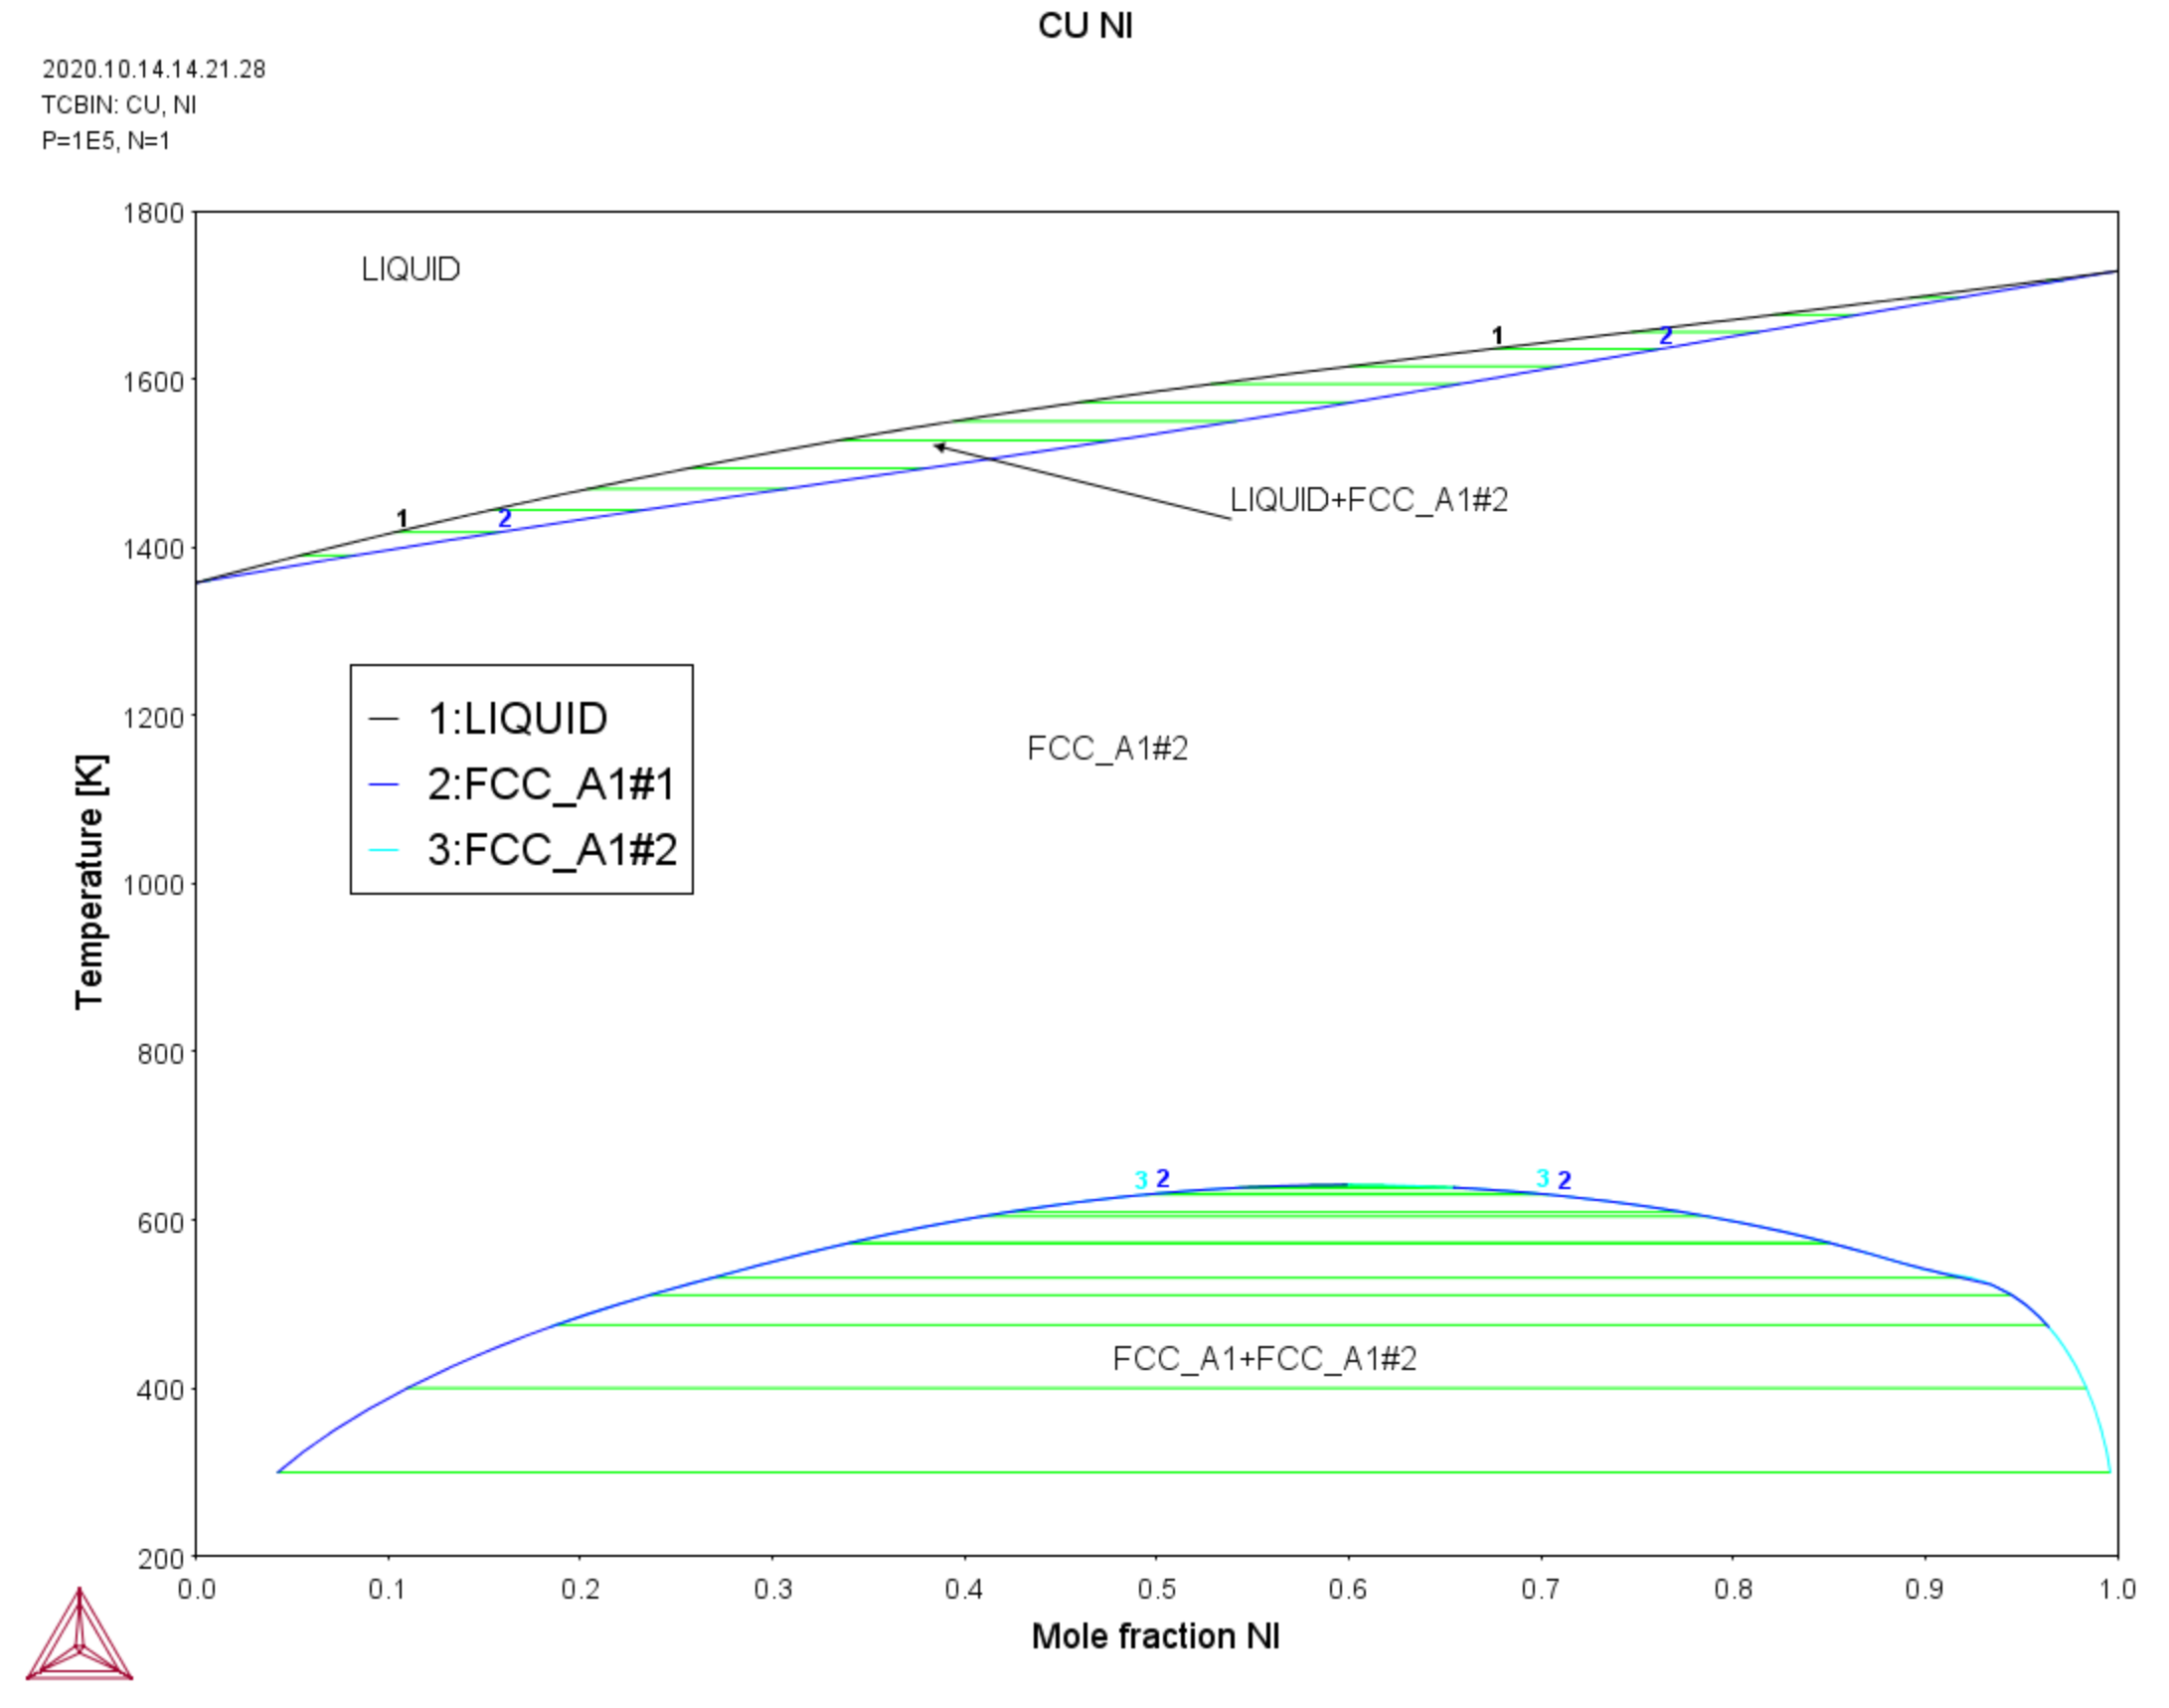

3. Найти и определить: 
    1. область непрерывных твердых растворов на диаграмме
        - T1-при которой при любой концентрации будет твердый раствор с одной структурой
    2. область непрерывных жидких растворов на диаграмме 
        - T2-при которой при любой концентрации будет жидкость

In [4]:
T1 = 1200 # только FCC_A1#2
T2 = 1800 # только LIQUID

temp = [T1, T2]
phases = ['FCC_A1', 'LIQUID']

### Зависимость энтальпии и энтропии смешения от концентрации

Сравнить расчет распределений для энтропии и энтальпии смешения полученный с помощью equilibrium и по формулам из статьи для жидкой и твердой фазы.

In [9]:
def calc(output_type, phase_num, hij = 4000):
    
    obj = 'энтальпии' if output_type == 'HM_MIX' else 'энтропии'
    phase_name = 'твердого' if phase_num == 0 else 'жидкого'
    
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    plt.grid()
    
    result = calculate(db, elements, phases[phase_num], P = press, T = temp[phase_num], output = output_type)
    if output_type == 'HM_MIX':
        # энтальпия
        ax.scatter(result.X.sel(component = elements[1]), result.HM_MIX, s = 2, color = 'palevioletred')
    else:
        # энтропия
        ax.scatter(result.X.sel(component = elements[1]), result.SM_MIX, s = 2, color = 'palevioletred')

    # Распределение из питона
    ax.set_title(f'Зависимость {obj} смешения от концентрации для {phase_name} раствора')
    ax.set_xlabel(f'X({elements[1]})')
    ax.set_ylabel(f'{output_type}, Дж/моль*К')
    ax.set_xlim((0, 1))

    # Распределние по формуле из статьи
    if output_type == 'HM_MIX':
        # энтальпия
        for i in np.arange(0.001,1,0.01):
            res = (4*hij*i*(1-i)) #h_mix
            plt.scatter(i, res, color = 'mediumseagreen', s = 4)
            plt.grid()
    else:
        # энтропия
        R=8.314462
        for i in np.arange(0.001,1,0.01):
            res = -R*(i*math.log(i)+(1-i)*math.log(1-i)) #SM_MIX
            plt.scatter(i, res, color = 'mediumseagreen', s = 4)
            plt.grid()

    plt.show()

#### Вывод:
    Значения, полученные по формулам, превышают значения, расчитанные с помощью методов python.
    Как правило, для твердых растворов разница значенительнее, чем для жидких.
    Нибольшая разница в распределениях наблюдается для энтальпии смешения твердого раствора ni-cu.
    Наименьшая разница в распределениях наблюдается для энтропии смешения жидкого раствора ni-cu.

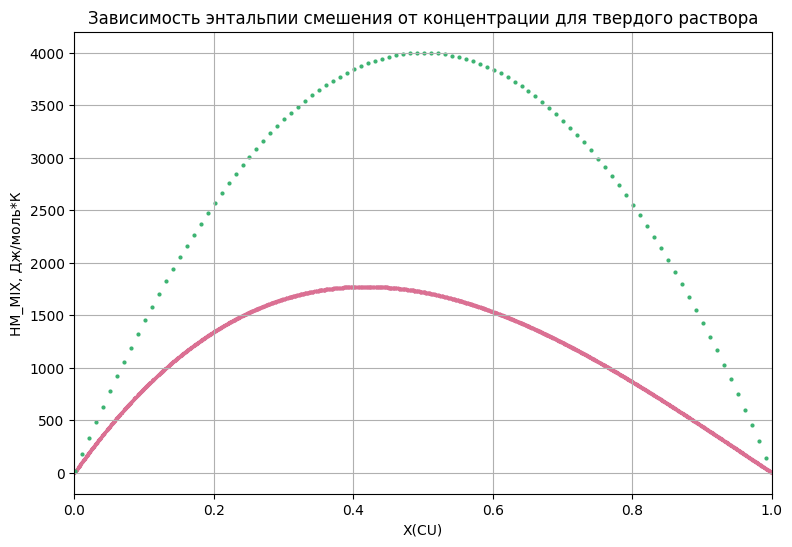

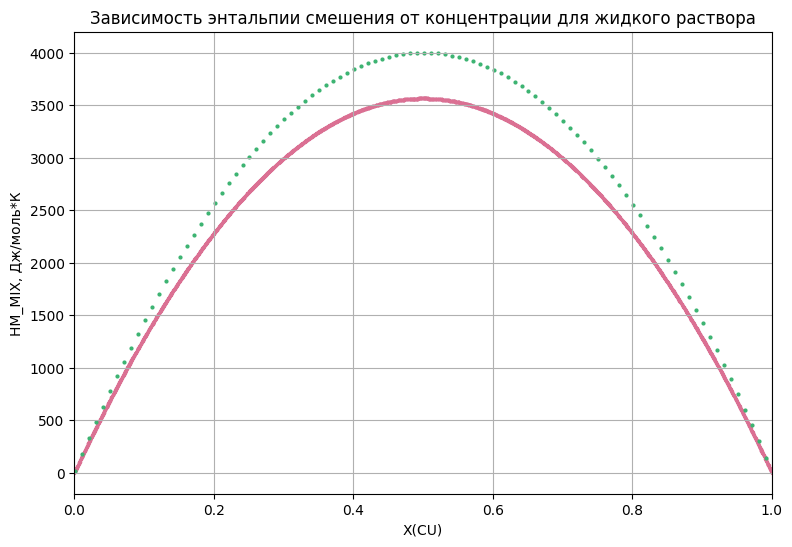

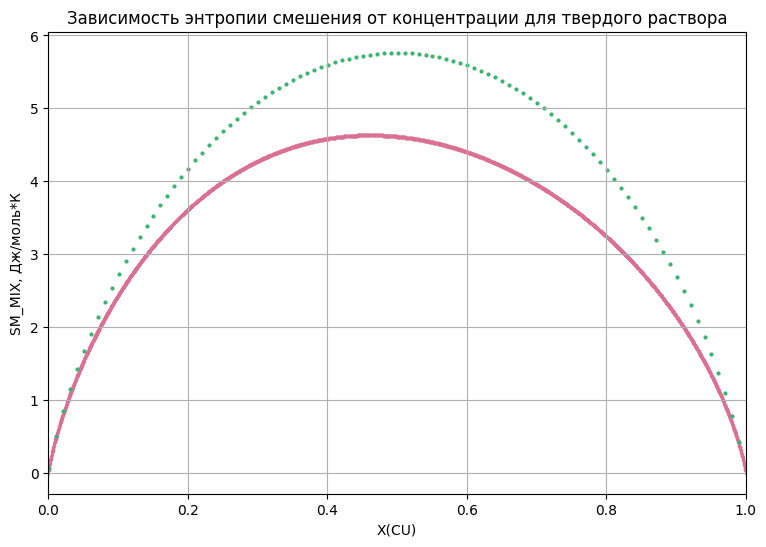

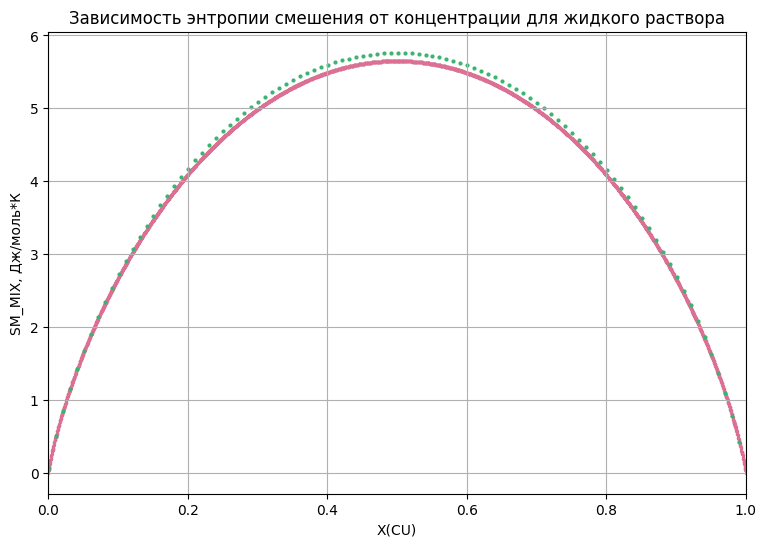

In [10]:
calc('HM_MIX', 0)
calc('HM_MIX', 1)
calc('SM_MIX', 0)
calc('SM_MIX', 1)